img shape: (2436, 1125, 3)


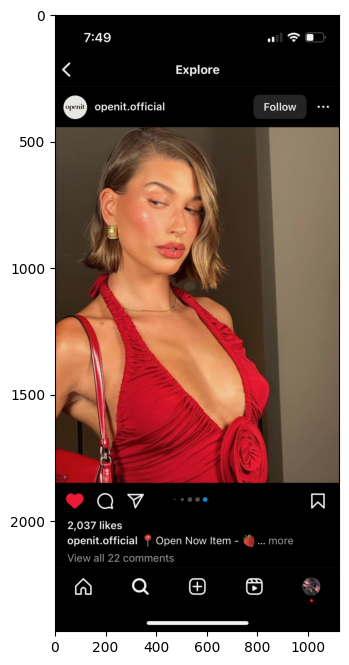

In [57]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 오드리햅번 이미지를 cv2로 로드하고 matplotlib으로 시각화

Img=cv2.imread('./instargram.jpeg')
Img_rgb=cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)#BGR을 RGB로
print('img shape:',Img.shape)

plt.figure(figsize=(8,8))
plt.imshow(Img_rgb)
plt.show()

In [16]:
#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환

_,regions=selectivesearch.selective_search(Img_rgb,scale=100,min_size=2000)

print(type(regions),len(regions))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


<class 'list'> 195


In [38]:
#rect 정보만 추출하기
label=[region['rect']for region in regions]
label

[(0, 0, 1124, 281),
 (110, 62, 115, 51),
 (470, 190, 187, 59),
 (0, 282, 1124, 157),
 (783, 315, 209, 95),
 (35, 320, 89, 89),
 (151, 342, 282, 50),
 (0, 430, 1124, 12),
 (0, 443, 1124, 87),
 (0, 444, 357, 743),
 (384, 444, 458, 817),
 (736, 444, 388, 1406),
 (846, 444, 278, 1405),
 (414, 446, 215, 121),
 (453, 465, 177, 263),
 (384, 466, 120, 56),
 (274, 471, 278, 147),
 (199, 490, 100, 118),
 (317, 506, 214, 139),
 (165, 528, 138, 181),
 (576, 528, 102, 329),
 (267, 529, 108, 97),
 (193, 557, 121, 126),
 (96, 559, 114, 385),
 (189, 568, 387, 449),
 (783, 584, 31, 440),
 (550, 643, 86, 242),
 (179, 648, 129, 147),
 (349, 670, 109, 85),
 (136, 679, 106, 273),
 (510, 681, 74, 97),
 (395, 744, 200, 257),
 (578, 798, 95, 221),
 (539, 815, 70, 179),
 (243, 864, 128, 147),
 (388, 874, 122, 93),
 (452, 875, 299, 471),
 (156, 877, 80, 118),
 (130, 880, 121, 149),
 (565, 902, 70, 181),
 (89, 904, 84, 84),
 (187, 928, 271, 245),
 (75, 953, 121, 112),
 (367, 998, 121, 139),
 (141, 1020, 177, 236

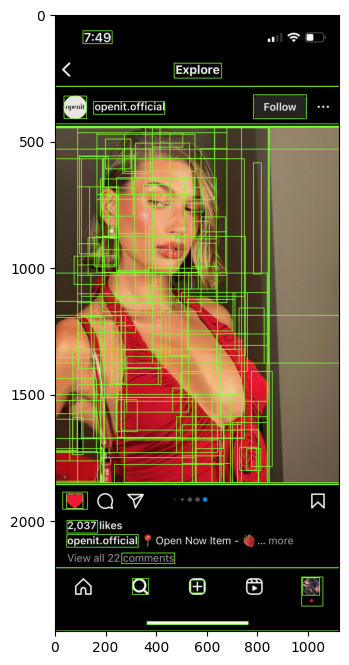

In [42]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌. 

green_rgb=(125,255,51)
Img_rgb_copy=Img_rgb.copy()
for rect in label:
    
    left=rect[0]
    top=rect[1]
    right= left+rect[2]
    bottom= top +rect[3]
    
    img_rgb_copy=cv2.rectangle(Img_rgb_copy,(left,top),(right,bottom),color=green_rgb,thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()
    

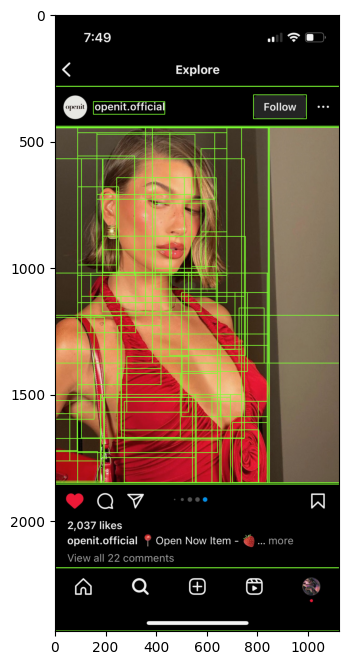

In [44]:
label2=[region['rect']for region in regions if region['size']>10000]

green_rgb=(125,255,51)
Img_rgb_copy=Img_rgb.copy()
for rect in label2:
    
    left=rect[0]
    top=rect[1]
    right= left+rect[2]
    bottom= top +rect[3]
    
    img_rgb_copy=cv2.rectangle(Img_rgb_copy,(left,top),(right,bottom),color=green_rgb,thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()
    

In [45]:
import numpy as np 
#얼마나 겹쳤는가
#iou = 겹친정도 
def compute_iou(pred_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(pred_box[0], gt_box[0])
    y1 = np.maximum(pred_box[1], gt_box[1])
    x2 = np.minimum(pred_box[2], gt_box[2])
    y2 = np.minimum(pred_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)# 겹친 면적
    
    pred_box_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])#pred_box 면적
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])#gt_box 면적
    union = pred_box_area + gt_box_area - intersection #전체면적
    
    iou = intersection / union #겹친 면적/전체면적
    return iou

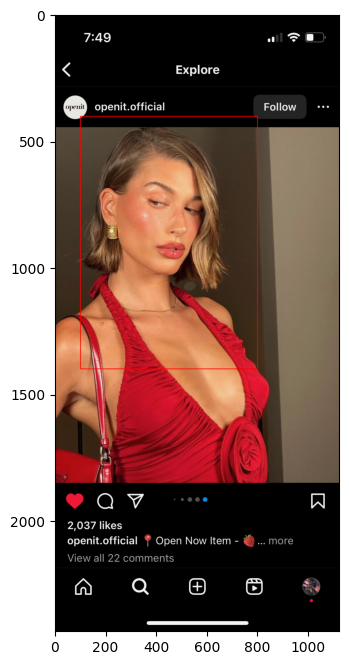

In [83]:
Img=cv2.imread('./instargram.jpeg')
Img_rgb=cv2.cvtColor(Img,cv2.COLOR_BGR2RGB)#BGR을 RGB로
gt_box=[100,400,700,1000]

red=(255,0,0)
object1=cv2.rectangle(Img_rgb,(gt_box[0],gt_box[1],gt_box[2],gt_box[3]),color=red,thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(Img_rgb)
plt.show()

In [64]:
import selectivesearch

img = cv2.imread('./instargram.jpeg')
img_rgb2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
_,regions= selectivesearch.selective_search(img_rgb2,scale=100,min_size=3000)

print(len(regions))

<class 'type'> 135


index : 21 iou : 0.42109823459330664 rectangle:  (179, 568, 584, 1137)
index : 78 iou : 0.40682222454745215 rectangle:  (179, 568, 584, 1173)
index : 83 iou : 0.40682222454745215 rectangle:  (179, 568, 584, 1173)
index : 91 iou : 0.6682722222222223 rectangle:  (136, 465, 630, 952)
index : 97 iou : 0.4160308170975628 rectangle:  (179, 568, 595, 1173)
index : 102 iou : 0.710122574282388 rectangle:  (136, 465, 673, 1083)
index : 111 iou : 0.4305503556720329 rectangle:  (0, 443, 1124, 857)
index : 114 iou : 0.710122574282388 rectangle:  (136, 465, 673, 1083)
index : 123 iou : 0.7353418806587719 rectangle:  (136, 446, 673, 1083)


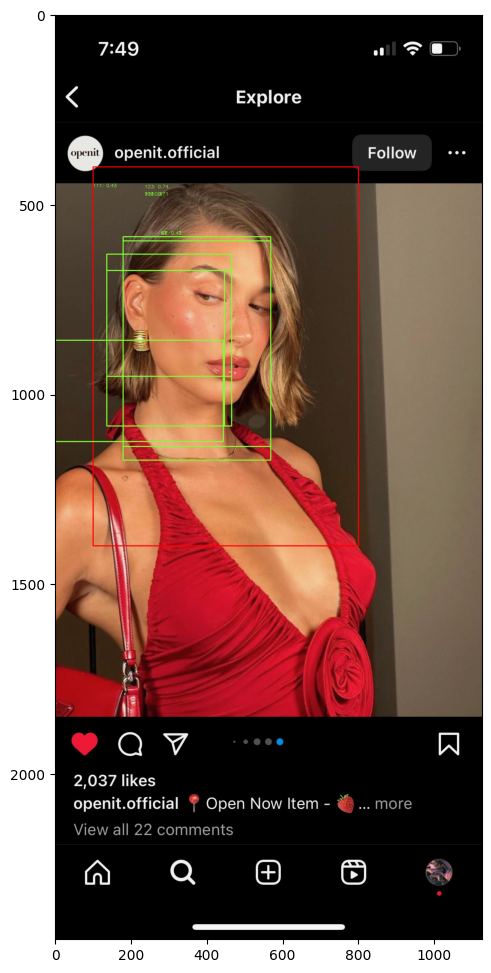

In [85]:
predict=[pred['rect'] for pred in regions]

for index,pred_box in enumerate(predict):
    pred_box=list(pred_box)
    pred_box[2]+=pred_box[0]
    pred_box[3]+=pred_box[1]
    
    iou = compute_iou(pred_box,gt_box)

    if iou >0.4:
        print('index :',index,"iou :",iou,"rectangle: ",(pred_box[0],pred_box[1],pred_box[2],pred_box[3]))
        cv2.rectangle(object1,(pred_box[0],pred_box[2]),(pred_box[1],pred_box[3]),color=green_rgb,thickness=2)
        text="{}: {:.2f}".format(index,iou)
        cv2.putText(object1,text,(pred_box[0]+100,pred_box[1]+10),cv2.FONT_HERSHEY_SIMPLEX,0.4,color=green_rgb,thickness=1)
plt.figure(figsize=(12,12))
plt.imshow(object1)
plt.show()
    

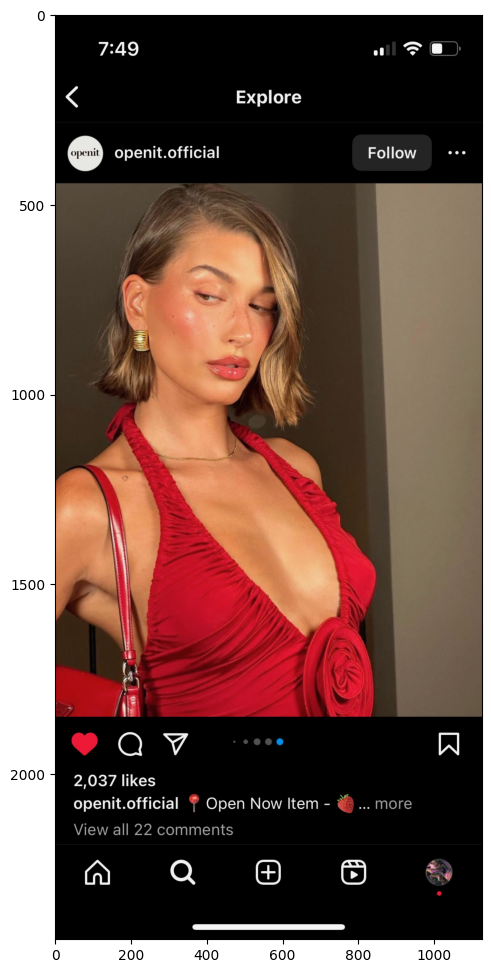